In [1]:
import numpy as np
from model import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.animation import FuncAnimation, PillowWriter
font_path = r'Mansalva\Mansalva-Regular.ttf'
fm.fontManager.addfont(font_path)

In [5]:
plt.rcParams.update({
    'font.family': 'Mansalva',    
    'font.size': 15,
    'axes.titleweight': 'bold',
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.titlesize': 18,
    'legend.fontsize': 14,
    'figure.facecolor': '#f7f7fa'
})


## Pain dynamics without tactile input

In [6]:
gate_control_model = GateControl(tactile_stimulus = False)
S, T, P = gate_control_model.simulate_ODE()
time_points = gate_control_model.time_points

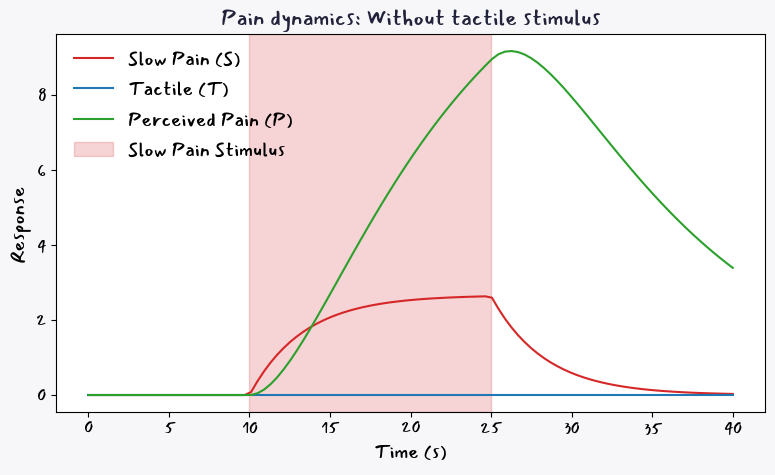

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(time_points, S, label='Slow Pain (S)', color='tab:red', linewidth=1.5)
ax.plot(time_points, T, label='Tactile (T)', color='tab:blue', linewidth=1.5)
ax.plot(time_points, P, label='Perceived Pain (P)', color='tab:green', linewidth=1.5)

ax.axvspan(10, 25, color='tab:red', alpha=0.2, label='Slow Pain Stimulus')

ax.set_xlabel('Time (s)')
ax.set_ylabel('Response')
ax.set_title('Pain dynamics: Without tactile stimulus', fontweight='bold', color='#22223b')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', frameon = False)
plt.tight_layout()
plt.savefig('pain_dynamics_without_tactile.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Pain dynamics with tactile input

In [9]:
gate_control_model = GateControl(tactile_stimulus = True)
S, T, P = gate_control_model.simulate_ODE()
time_points = gate_control_model.time_points

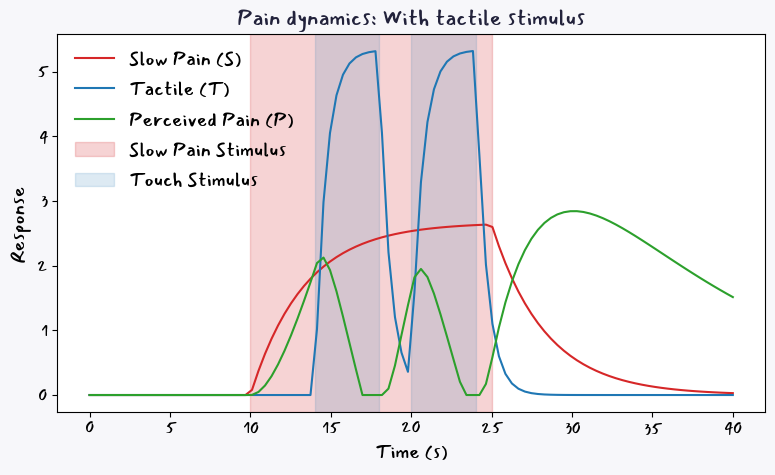

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(time_points, S, label='Slow Pain (S)', color='tab:red', linewidth=1.5)
ax.plot(time_points, T, label='Tactile (T)', color='tab:blue', linewidth=1.5)
ax.plot(time_points, P, label='Perceived Pain (P)', color='tab:green', linewidth=1.5)

ax.axvspan(10, 25, color='tab:red', alpha=0.2, label='Slow Pain Stimulus')
touch_regions = [(14, 18), (20, 24)]  # Define touch stimulus regions
for i, (start, end) in enumerate(touch_regions):
    ax.axvspan(start, end, color='tab:blue', alpha=0.15, label='Touch Stimulus' if i == 0 else None)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Response')
ax.set_title('Pain dynamics: With tactile stimulus', fontweight='bold', color='#22223b')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', frameon = False)
plt.tight_layout()
plt.savefig('pain_dynamics_with_tactile.png', dpi = 300, bbox_inches = 'tight')
plt.show()